<a href="https://colab.research.google.com/github/citronella3alain/segment_digits/blob/main/digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
import tensorflow as tf
import tensorflow_datasets as tfds

(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [135]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [136]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28), name="flat"),
  tf.keras.layers.Dense(128, activation='relu', name="dense1"),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6
469/469 [==============================] - 9s 6ms/step - loss: 0.3534 - sparse_categorical_accuracy: 0.9020 - val_loss: 0.1928 - val_sparse_categorical_accuracy: 0.9448
Epoch 2/6
469/469 [==============================] - 2s 3ms/step - loss: 0.1602 - sparse_categorical_accuracy: 0.9540 - val_loss: 0.1324 - val_sparse_categorical_accuracy: 0.9606
Epoch 3/6
469/469 [==============================] - 2s 3ms/step - loss: 0.1131 - sparse_categorical_accuracy: 0.9675 - val_loss: 0.1037 - val_sparse_categorical_accuracy: 0.9683
Epoch 4/6
469/469 [==============================] - 2s 3ms/step - loss: 0.0868 - sparse_categorical_accuracy: 0.9752 - val_loss: 0.0986 - val_sparse_categorical_accuracy: 0.9705
Epoch 5/6
469/469 [==============================] - 2s 4ms/step - loss: 0.0699 - sparse_categorical_accuracy: 0.9798 - val_loss: 0.0825 - val_sparse_categorical_accuracy: 0.9740
Epoch 6/6
469/469 [==============================] - 2s 3ms/step - loss: 0.0573 - sparse_categorical_accu

In [137]:
# tf.keras.layers.InputLayer(input_shape=(28, 28), name='input'), 
prob_model = tf.keras.Sequential([model, tf.keras.layers.Softmax(name='softmax')])

In [138]:
print(ds_info.features['label'].names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [139]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
img3 = cv2.imread('/content/obj_3.png')
img4 = cv2.imread('/content/obj_4.png')
# img3 = np.load('/content/obj_3.npy')
# img4 = np.load('/content/obj_4.npy')
img3_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
img4_gray = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)

print(img3.shape)

(28, 28, 3)


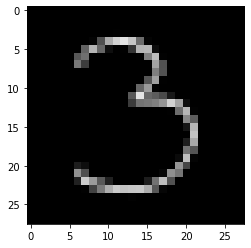

In [140]:
plt.imshow(imutils.opencv2matplotlib(img3))

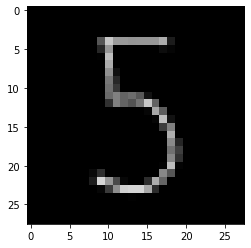

In [141]:
plt.imshow(imutils.opencv2matplotlib(img4))

In [142]:
result = prob_model.predict(np.array([img3_gray, img4_gray]))
print(result)
print(np.argmax(result, axis=1))
print()

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[3 5]

